## 2. Linear regression on house dataset

Use this dataset on [house price prediction in kaggle](https://www.kaggle.com/datasets/shree1992/housedata/data), perform EDA on it and then predict the house prices using linear regression. You can drop the categorical features and the date columns. Then try ElasticNetCV and RidgeCV on the same dataset. Record the scores in a dataframe with the columns mae, mse, rmse so you can compare the models.

In [ ]:
import pandas as pd

df = pd.read_csv("../../data/house_data.csv")

# remove rows where house price is 0
df = df.query("price > 0")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### EDA on dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [15]:
df.shape

(4600, 18)

In [44]:
df.describe().drop(["count", "25%", "75%"])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### drop all columns with object-Dtype

In [45]:
df.drop(["date", "street", "city", "statezip", "country"], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


<Axes: xlabel='sqft_basement'>

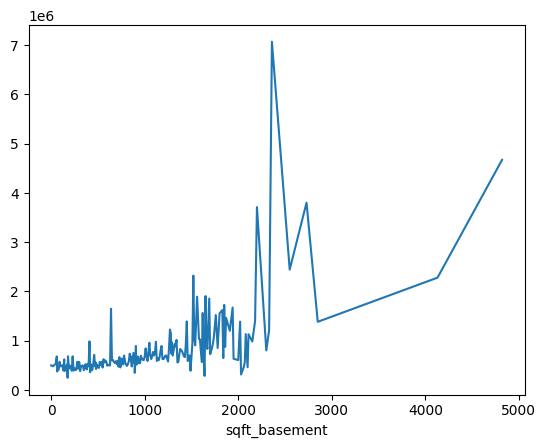

In [18]:
df.groupby("sqft_basement")["price"].mean().plot()

<Axes: xlabel='yr_built'>

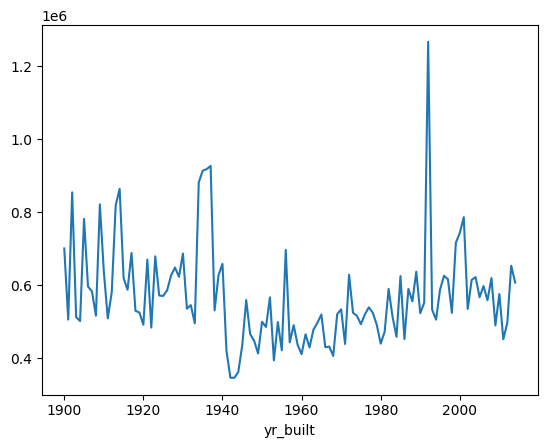

In [19]:
df.groupby("yr_built")["price"].mean().plot()

<Axes: xlabel='yr_renovated'>

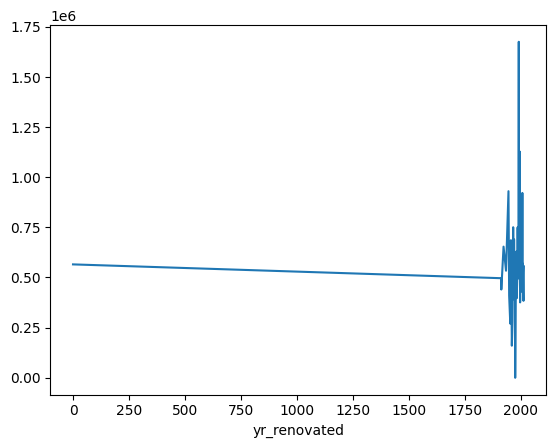

In [20]:
df.groupby("yr_renovated")["price"].mean().plot()

<Axes: xlabel='bathrooms'>

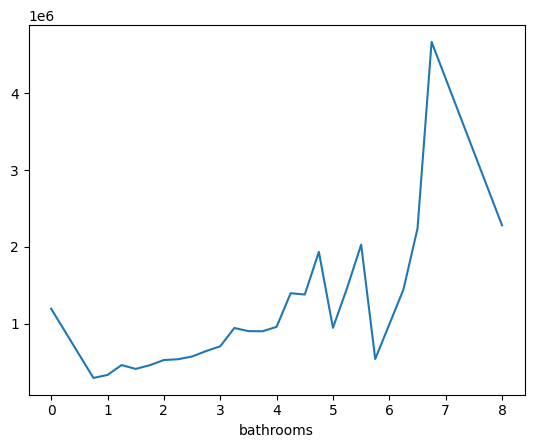

In [31]:
df.groupby("bathrooms")["price"].mean().plot()

<Axes: xlabel='sqft_living'>

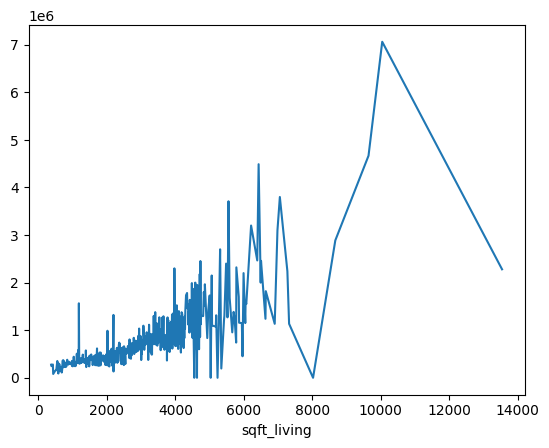

In [22]:
df.groupby("sqft_living")["price"].mean().plot()

<Axes: xlabel='sqft_lot'>

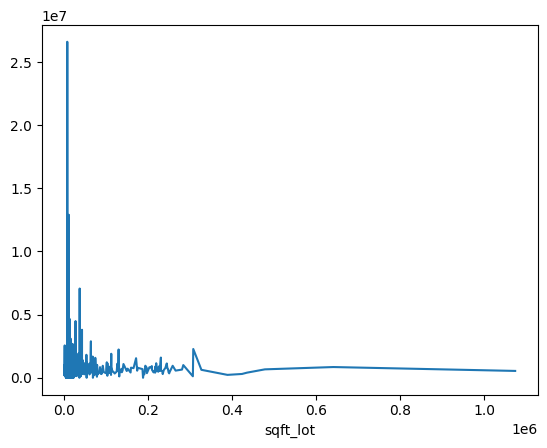

In [23]:
df.groupby("sqft_lot")["price"].mean().plot()

<Axes: xlabel='floors'>

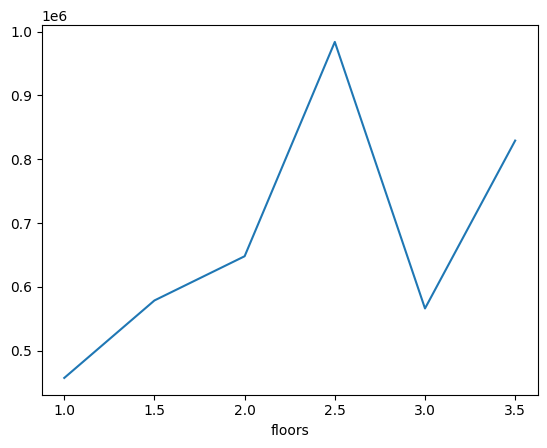

In [24]:
df.groupby("floors")["price"].mean().plot()

<Axes: xlabel='waterfront'>

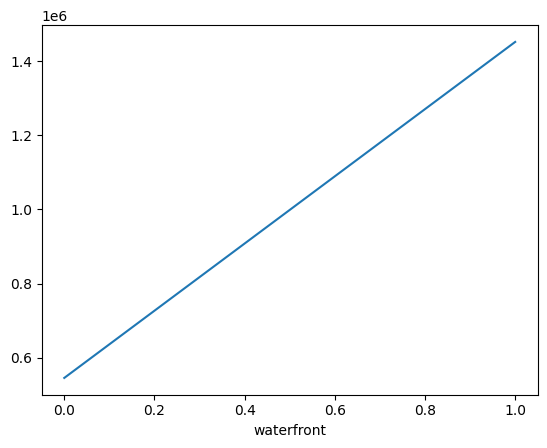

In [25]:
df.groupby("waterfront")["price"].mean().plot()

<Axes: xlabel='view'>

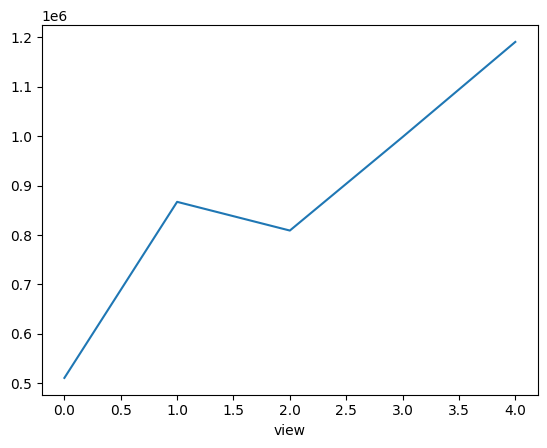

In [26]:
df.groupby("view")["price"].mean().plot()

<Axes: xlabel='condition'>

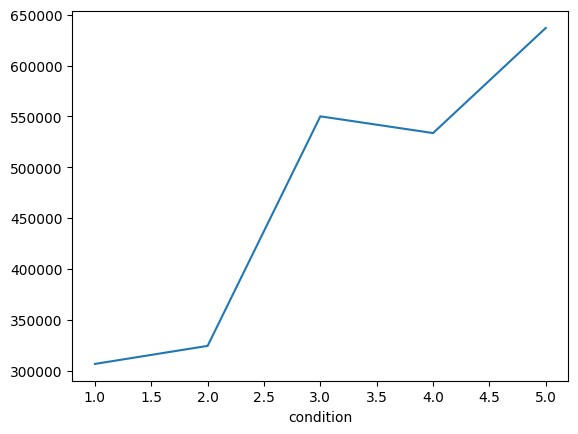

In [27]:
df.groupby("condition")["price"].mean().plot()

<Axes: xlabel='sqft_above'>

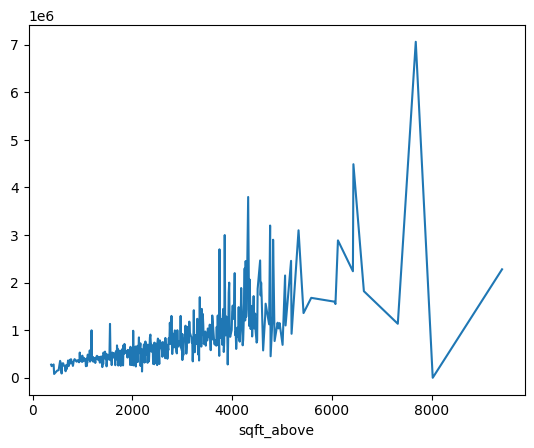

In [28]:
df.groupby("sqft_above")["price"].mean().plot()

<Axes: xlabel='bedrooms'>

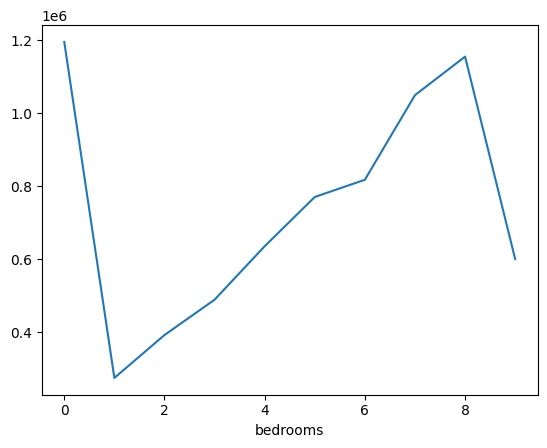

In [29]:
df.groupby("bedrooms")["price"].mean().plot()

#### categorical features kan innebära antingen objekt och datum Dtype, eller även heltal med intervall 0-5, men i detta dataset så är condition, bedrooms och bathrooms relevanta för priset

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


### split into train|test-data

In [46]:
from sklearn.model_selection import train_test_split

X, y = df.drop("price", axis=1), df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (3049, 12)
y_train.shape = (3049,)
X_test.shape = (1502, 12)
y_test.shape = (1502,)


### LinearRegression model

#### prediction

In [47]:
from sklearn.linear_model import LinearRegression
# Use this dataset on [house price prediction in kaggle](https://www.kaggle.com/datasets/shree1992/housedata/data), perform EDA on it and then predict the house prices using linear regression. You can drop the categorical features and the date columns. Then try ElasticNetCV and RidgeCV on the same dataset. Record the scores in a dataframe with the columns mae, mse, rmse so you can compare the models.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
y_pred[:5]

array([1370257.49190477,  608251.99107949,  657977.77818929,
        279447.06287659,  522732.44380386])

In [48]:
y_test.iloc[:5]

471     1225000.0
2518     496752.0
23       612500.0
3922     265000.0
135      615000.0
Name: price, dtype: float64

#### error metrics

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")



linear_df ={
        "mae": mae,
        "mse": mse,
        "rmse": rmse
    }

linear_df = pd.DataFrame(linear_df.items(), columns= ["type", "value"])
linear_df

mae = 158370.37304233602
mse = 53255714398.18432
rmse = 230771.99656410722


,type,value
0,mae,1.583704e+05
1,mse,5.325571e+10
2,rmse,2.307720e+05


### ElasticNet model

#### prediction

In [66]:
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV()

elastic_model.fit(X_train, y_train)
y_pred = elastic_model.predict(X_test)

y_pred[:5], y_test[:5]

(array([1065889.23275474,  514737.10179361,  679502.79908487,
         384848.74144733,  591399.58652152]),
 471     1225000.0
 2518     496752.0
 23       612500.0
 3922     265000.0
 135      615000.0
 Name: price, dtype: float64)

#### error metrics

In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")



elastic_df ={
        "mae": mae,
        "mse": mse,
        "rmse": rmse
    }

elastic_df = pd.DataFrame(elastic_df.items(), columns= ["type", "value"])
elastic_df

mae = 176080.3591142602
mse = 71589367602.62106
rmse = 267561.89490026614


,type,value
0,mae,1.760804e+05
1,mse,7.158937e+10
2,rmse,2.675619e+05


### RidgeCV model

#### prediction

In [64]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV()

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

y_pred[:5], y_test[:5]

(array([1370431.80867291,  609667.48462784,  658627.11064162,
         278273.06018046,  522347.51450996]),
 471     1225000.0
 2518     496752.0
 23       612500.0
 3922     265000.0
 135      615000.0
 Name: price, dtype: float64)

#### error metrics

In [65]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")



ridge_df ={
        "mae": mae,
        "mse": mse,
        "rmse": rmse
    }

ridge_df = pd.DataFrame(ridge_df.items(), columns= ["type", "value"])
ridge_df

mae = 158590.13972095627
mse = 53385167885.37591
rmse = 231052.305518417


,type,value
0,mae,1.585901e+05
1,mse,5.338517e+10
2,rmse,2.310523e+05


### running all models at the same time with for-loop

In [79]:
# create dictionary containing separate instances of each model
models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(),
    "ElasticNetCV": ElasticNetCV()
}

results = []
answer = y_test.iloc[0]
# loop through each model and preform all steps 1 by 1
for name, model in models.items():
    # fit values for each model
    model.fit(X_train, y_train)
    # get y predictions from hidden X data for each model
    y_pred = model.predict(X_test)
    prediction = y_pred[0]
    # get error metrics for each model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    # append values to list for each model
    results.append([name, mae, mse, rmse, prediction, answer, prediction-answer])

# make dataframe with values from results-list
result_df = pd.DataFrame(results, columns=["model", "mae", "mse", "rmse", "prediction", "answer", "pred_diff"])
result_df

,model,mae,mse,rmse,prediction,answer,pred_diff
0,LinearRegression,158370.373042,5.325571e+10,230771.996564,1.370257e+06,1225000.0,145257.491905
1,RidgeCV,158590.139721,5.338517e+10,231052.305518,1.370432e+06,1225000.0,145431.808673
2,ElasticNetCV,176080.359114,7.158937e+10,267561.894900,1.065889e+06,1225000.0,-159110.767245
